In [1]:
%load_ext autoreload

%autoreload 2
import sys
import corner
import numpy as np
import matplotlib.pyplot as plt
import scipy
def binning(corner): return [[corner[i],corner[i+1]] for i in range(len(corner)-1)]
sys.path.append('/pbs/throng/lsst/users/cpayerne/LikelihoodsClusterAbundance/modules/pinocchio_analysis_unbinned_SSC/')
import _analysis_mock_samples as analysis
sys.path.append('/pbs/throng/lsst/users/cpayerne/LikelihoodsClusterAbundance/modules/')
import covariance as covar
import plot_function as plotssc
import pandas as pd
import abundance as cl_count
import forecast
import emcee
from lnlikelihood import lnLikelihood
import pyccl as ccl
import edit, sys
import h5py, glob
Omega_c_true = 0.30711 - 0.048254
Omega_b_true = 0.048254
sigma8_true = .8288
Omegam_true = 0.30711
True_value = [Omega_c_true + Omega_b_true, sigma8_true]
import matplotlib as mpl

/pbs/home/c/cpayerne/.conda/envs/myenv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def load_pickle(filename, **kwargs):
    with open(filename, 'rb') as fin:
        return pickle.load(fin, **kwargs)

In [3]:
 d = '/pbs/throng/lsst/users/cpayerne/LikelihoodsClusterAbundance/notebooks/Unbinned_likelihood_with_SSC/SSC_contribution/SSC_paper/'

In [26]:
cat = 400

0.0008010836386826673
0.3074307815097239


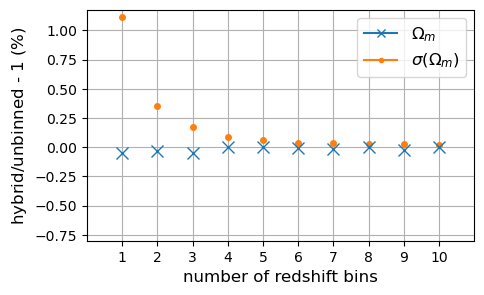

In [87]:
plt.figure(figsize=(5,3),)
name_sample10 = ['S' + str(i+1) for i in range(10)]
file_hybrid10 = [d+'{}_cat={}_sample_{}_varying_nbins_hybrid.pkl'.format('hybrid_garrell', cat, s) for s in name_sample10]
N10 = [1,2,3,4,5,6,7,8,9,10]

filename = d+F'standard_unbinned_cat={cat}_sample_S1_standard_unbinned.pkl'
res1 = plotssc.likelihood_load(file = filename)
mean_Om_SN1 = np.trapz(res1['PSNSSC']*res1['Om'], res1['Om'])/np.trapz(res1['PSNSSC'], res1['Om'])
err_Om_SN1 = np.trapz((mean_Om_SN1 - res1['Om'])**2*res1['PSNSSC'], res1['Om'])**.5
#plt.errorbar(N10,mean_Om_SN1*(1+np.zeros(len(N10))), marker = '.',  color='C0',)
print(err_Om_SN1)
print(mean_Om_SN1)
for i in range(10):
    res = plotssc.likelihood_load(file = file_hybrid10[i])
    mean_Om_SN = np.trapz(res['PSN']*res['Om'], res['Om'])/np.trapz(res['PSN'], res['Om'])
    err_Om_SN = np.trapz((mean_Om_SN - res['Om'])**2*res['PSN'], res['Om'])**.5
    err_ratio2 = err_Om_SN**2/(mean_Om_SN1**2) + (mean_Om_SN**2)*(err_Om_SN1**2)/mean_Om_SN1**4
    plt.errorbar(N10[i],100*(err_Om_SN-err_Om_SN1)/err_Om_SN1,  marker = '.',  color='C1',markersize=8)
    plt.errorbar(N10[i],100*(mean_Om_SN-mean_Om_SN1)/mean_Om_SN1,  marker = 'x',  color='C0',zorder=100,markersize=8)

plt.errorbar([], [],marker = 'x', color='C0', label = r'$\Omega_m$')
plt.errorbar([], [],marker = '.', color='C1', label = r'$\sigma(\Omega_m)$')
plt.xlabel('number of redshift bins', fontsize=12)
plt.ylabel(r'hybrid/unbinned - 1 ($\%$)', fontsize=12)
plt.grid(which='both')
plt.ylim(-.8, )
plt.xlim(0, 11)
plt.xticks(N10, [str(N10[i]) for i in range(len(N10))])
plt.legend(loc = 'upper right', fontsize=12)
plt.savefig('hybrid_vs_unbinned.png', bbox_inches='tight', dpi=300)